In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import math
import csv
from matplotlib.dates import DateFormatter 

%matplotlib inline

In [2]:
path_data = '../data/split_data_77/'
save_figs = '../results/77/figs_doc'
dsd_file = 'dsd_data_77_nh_sorted_2016_1.csv'
dsd_number = (dsd_file[dsd_file.find("a_") + 2:dsd_file.find("_n")])

In [3]:
### DATOS MEDIDOS POR LOS DISDROMETROS 
chunks = pd.read_csv('{}/{}'.format(path_data, dsd_file), delimiter=',', header=None, chunksize=10 ** 4,
                     low_memory=False, na_values='999.999', iterator=True, usecols=[0,9,12,14])
dsd_final = pd.DataFrame()
results2 = pd.DataFrame()
i = 0
for chunk in chunks:
    i +=1
    dsd_data_final = chunk.copy()    
    dsd_data_final['Date_str'] = chunk[0].astype(str)
    dsd_data_final['Date'] = pd.to_datetime(dsd_data_final['Date_str'], format='%Y-%m-%d %H:%M:%S')
    dsd_data_final = dsd_data_final.drop_duplicates('Date', keep='first')
    dsd_data_final.set_index('Date', inplace=True)
    start = dsd_data_final.index[0]
    end =  dsd_data_final.index[-1]
    idx = pd.date_range(start, end, freq='Min')
    results1 = pd.DataFrame(index=idx)
    results1['rain_mred'] = dsd_data_final[9]
    results1['rain_mred_2'] = dsd_data_final[12]
    results1['Z_mred'] = dsd_data_final[14]
    results2 = results2.append(results1)

writer = pd.ExcelWriter('{}/results2.xlsx'.format(save_figs))
results2.to_excel(writer)
writer.save()

In [4]:
#### DATOS DE DISDROMETRO CALCULADOS
res_77 = '/media/alfonso/46CE677FCE676661/ALFONSO/UNIVERSIDAD/repositorios/Varios/results/77/dsd_results_77_100_1_sin_filtro.xlsx'
df_77 = pd.read_excel(res_77, header=0)

In [6]:
### DATOS MEDIDOS POR LAS ESTACIONES EN TIERRA
path_est = '/media/alfonso/46CE677FCE676661/ALFONSO/UNIVERSIDAD/DATOS_TESIS/Estaciones/889'
file_201 = '{}/estacion_data_precipitacion_201__20160701_20160731.csv'.format(path_est)
df_201 = pd.read_csv(file_201, header=0)
df_201['date'] = pd.to_datetime(df_201['fecha_hora'], format='%Y-%m-%d %H:%M:%S')
df_201.set_index('date', drop=True, inplace=True)
df_201.drop('fecha_hora', axis=1, inplace=True)
df_201['pp_mm/hr'] = df_201['P1']*60

# Gráfica de NT

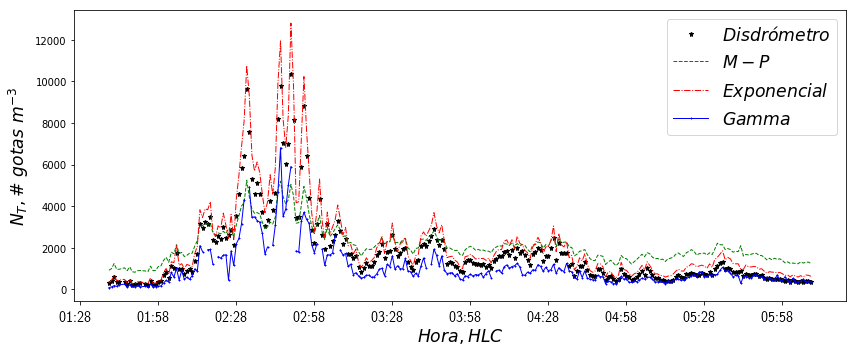

In [7]:
start = '2016-07-06 01:30'
end = '2016-07-06 06:10'

dates2 = df_77.index[(df_77.index > start) & (df_77.index < end) ]

plt.figure(figsize=(12,5))
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'NT_dsd'], 'k*', markersize=5, linewidth=2, 
         label=ur'$Disdrómetro$')
# plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'NT_dsd_1'], 'c--', markersize=2, linewidth=1, 
#          label=ur'$Disdrómetro_nd$')
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'NT_mp'], 'g--', markersize=2, linewidth=1, 
         label=ur'$M - P$')
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'NT_exp'], 'r-.', markersize=2, linewidth=1, 
          label=ur'$Exponencial$')
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'NT_246_1'], 'b+-', markersize=2, linewidth=1, label=ur'$Gamma$')
# plt.plot(df_77.loc[dates2].index, df_77=2, linewidth=1, label=ur'$Gamma$')

plt.xlabel('$Hora, HLC$', fontsize='xx-large')
plt.ylabel(r'$N_T,\#\  gotas \ m^{-3}$', fontsize='xx-large')
# plt.yticks(usetex=True, size='x-large')
plt.xticks(usetex=True, size='x-large')
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.legend(fontsize='xx-large')
plt.tight_layout()
# plt.savefig('{}/nt_series_77.png'.format(save_figs), type='png', bbox_inches='tight', dpi=150)

# Gráfica de W

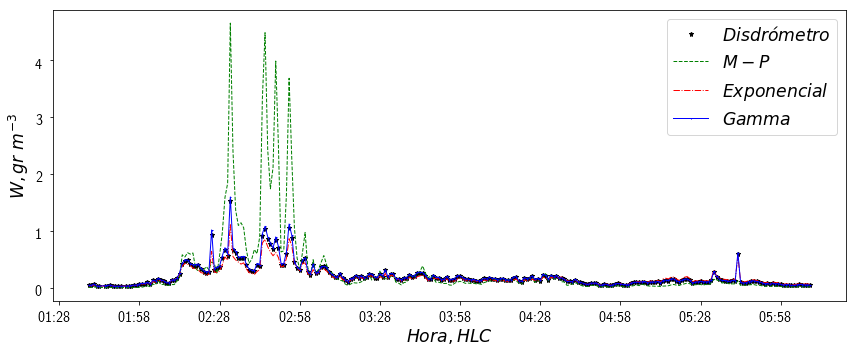

In [8]:
start = '2016-07-06 01:35'
end = '2016-07-06 06:10'
dates = results2.index[(results2.index > start) & (results2.index < end)]
dates2 = df_77.index[(df_77.index > start) & (df_77.index < end) ]
# dates1 = df_all.index[(df_all.index > start) & (df_all.index < end)]
dates3 = df_201.index[(df_201.index > start) & (df_201.index < end)]

plt.figure(figsize=(12,5))
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'W_dsd'], 'k*', markersize=5, linewidth=2, label=ur'$Disdrómetro$')
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'W_mp'], 'g--', markersize=1, linewidth=1, label=ur'$M - P$')
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'W_exp'], 'r-.', markersize=1, linewidth=1, label=ur'$Exponencial$')
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'W_246'], 'b-+', markersize=1, linewidth=1, label=ur'$Gamma$')
plt.xlabel('$Hora, HLC$', fontsize='xx-large')
plt.ylabel(r'$W, gr \ m^{-3}$', fontsize='xx-large')
plt.yticks(usetex=True, size='x-large')
plt.xticks(usetex=True, size='x-large')
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.legend(loc=1, prop={'size': 'xx-large'})
plt.tight_layout()
# plt.savefig('{}/W_series_77.png'.format(save_figs), type='png', bbox_inches='tight', dpi=150)

# Gráfica de Z 

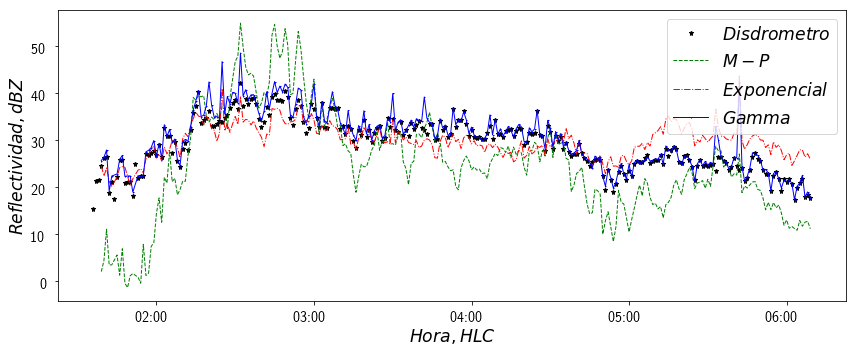

In [9]:
start = '2016-07-06 01:35'
end = '2016-07-06 06:10'
dates = results2.index[(results2.index > start) & (results2.index < end)]
dates2 = df_77.index[(df_77.index > start) & (df_77.index < end) ]
dates1 = df_all.index[(df_all.index > start) & (df_all.index < end)]
dates3 = df_201.index[(df_201.index > start) & (df_201.index < end)]

plt.figure(figsize=(12,5))
plt.plot(results2.loc[dates].index.to_pydatetime(), results2.loc[dates, 'Z_mred'],'k*', markersize=5, linewidth=2)
# plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'Z_dsd_cal'], 'y*', markersize=3, linewidth=1)
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'Z_mp'], 'g--', markersize=1, linewidth=1)
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'Z_exp'], 'r-.', markersize=1, linewidth=1)
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'Z_246'], 'b-+',  markersize=1, linewidth=1)

plt.xlabel('$Hora, HLC$', fontsize='xx-large')
plt.ylabel(ur'$Reflectividad, dBZ$', fontsize='xx-large')
plt.yticks(usetex=True, size='x-large')
plt.xticks(usetex=True, size='x-large')
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.legend([ur'$Disdrometro$', '$M-P$', '$Exponencial$', '$Gamma$'], loc=1, prop={'size': 'xx-large'})
plt.tight_layout()
# plt.savefig('{}/Z_series_77.png'.format(save_figs), type='png', bbox_inches='tight', dpi=300)

# Gráfica de R

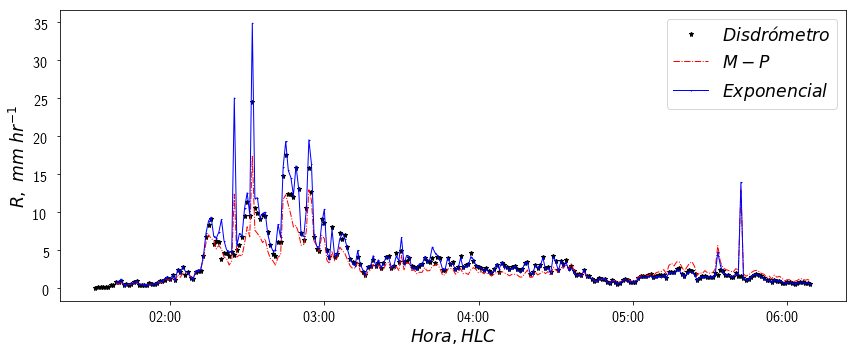

In [10]:
start = '2016-07-06 01:30'
end = '2016-07-06 06:10'
dates = results2.index[(results2.index > start) & (results2.index < end)]
dates2 = df_77.index[(df_77.index > start) & (df_77.index < end) ]
dates1 = df_all.index[(df_all.index > start) & (df_all.index < end)]
dates3 = df_201.index[(df_201.index > start) & (df_201.index < end)]

plt.figure(figsize=(12,5))
plt.plot(results2.loc[dates].index.to_pydatetime(), results2.loc[dates, 'rain_mred'],'k*', markersize=5, linewidth=2)
# plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'R_mp'], 'g--', markersize=1, linewidth=1)
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'R_exp'], 'r-.', markersize=1, linewidth=1)
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'R_246'], 'b-+',  markersize=1, linewidth=1 )

plt.xlabel('$Hora, HLC$', fontsize='xx-large')
plt.ylabel(r'$R,\ mm\ hr^{-1}$', fontsize='xx-large')
plt.yticks(usetex=True, size='x-large')
plt.xticks(usetex=True, size='x-large')
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.legend([ur'$Disdrómetro$', '$M-P$','$Exponencial$', '$Gamma$'], loc=1, prop={'size': 'xx-large'})
plt.tight_layout()
# plt.savefig('{}/R_series_77.png'.format(save_figs), type='png', bbox_inches='tight', dpi=150)

# Gráfica de Da


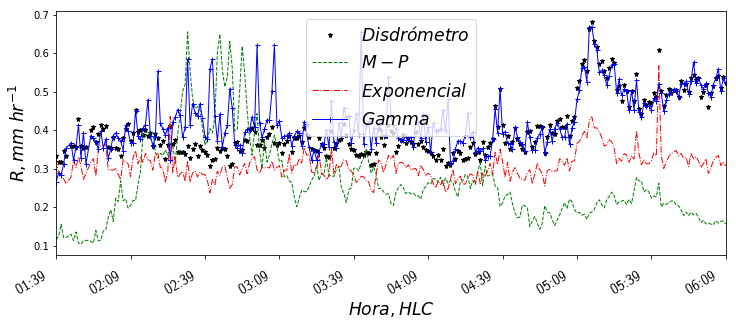

In [11]:
start = '2016-07-06 01:30'
end = '2016-07-06 06:10'
dates = results2.index[(results2.index > start) & (results2.index < end)]
dates2 = df_77.index[(df_77.index > start) & (df_77.index < end) ]
# dates1 = df_all.index[(df_all.index > start) & (df_all.index < end)]
dates3 = df_201.index[(df_201.index > start) & (df_201.index < end)]

plt.figure(figsize=(12,5))
df_77.loc[dates2, 'Da_dsd'].plot(style='k*', markersize=5, linewidth=2)
df_77.loc[dates2, 'Da_mp'].plot(style='g--', markersize=5, linewidth=1)
df_77.loc[dates2, 'Da_exp'].plot(style='r-.', markersize=5, linewidth=1)
df_77.loc[dates2, 'Da_234_2'].plot(style='b-+', markersize=5, linewidth=1)
plt.xlabel('$Hora, HLC$', fontsize='xx-large')
plt.ylabel(r'$R, mm \ hr^{-1}$', fontsize='xx-large')
# plt.yticks(usetex=True, size='x-large')
plt.xticks(usetex=True, size='x-large')
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.legend([ur'$Disdrómetro$', '$M-P$','$Exponencial$', '$Gamma$'],  prop={'size': 'xx-large'})
# plt.savefig('{}/Da_series_77.png'.format(save_figs), type='png', bbox_inches='tight', dpi=150)

# Gráfica De

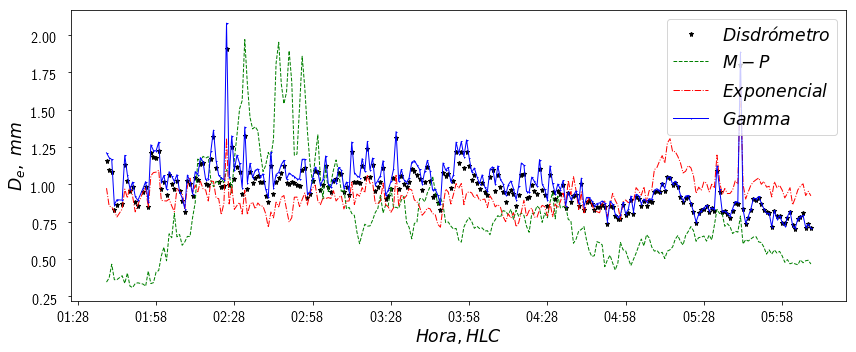

In [12]:
start = '2016-07-06 01:35'
end = '2016-07-06 06:10'
dates = results2.index[(results2.index > start) & (results2.index < end)]
dates2 = df_77.index[(df_77.index > start) & (df_77.index < end) ]
dates1 = df_all.index[(df_all.index > start) & (df_all.index < end)]
dates3 = df_201.index[(df_201.index > start) & (df_201.index < end)]

plt.figure(figsize=(12,5))
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'De_dsd'],'k*', markersize=5, linewidth=2)
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'De_mp'], 'g--', markersize=1, linewidth=1)
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'De_exp'], 'r-.', markersize=1, linewidth=1)
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'De_246'], 'b-+',  markersize=1, linewidth=1 )

plt.xlabel('$Hora, HLC$', fontsize='xx-large')
plt.ylabel(r'$D_e,\ mm$', fontsize='xx-large')
plt.yticks(usetex=True, size='x-large')
plt.xticks(usetex=True, size='x-large')
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.legend([ur'$Disdrómetro$', '$M-P$','$Exponencial$', '$Gamma$'], loc=1, prop={'size': 'xx-large'})
plt.tight_layout()
# plt.savefig('{}/De_series_77.png'.format(save_figs), type='png', bbox_inches='tight', dpi=150)

# Gráfica Dm

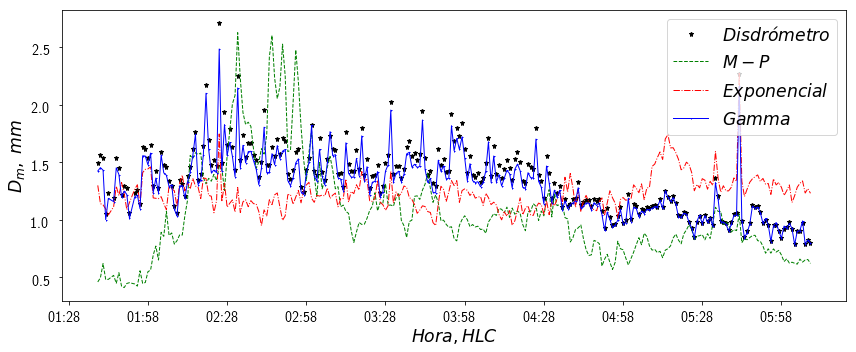

In [13]:
start = '2016-07-06 01:30'
end = '2016-07-06 06:10'
dates = results2.index[(results2.index > start) & (results2.index < end)]
dates2 = df_77.index[(df_77.index > start) & (df_77.index < end) ]
dates1 = df_all.index[(df_all.index > start) & (df_all.index < end)]
dates3 = df_201.index[(df_201.index > start) & (df_201.index < end)]

plt.figure(figsize=(12,5))
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'Dm_dsd'],'k*', markersize=5, linewidth=2)
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'Dm_mp'], 'g--', markersize=1, linewidth=1)
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'Dm_exp'], 'r-.', markersize=1, linewidth=1)
plt.plot(df_77.loc[dates2].index, df_77.loc[dates2, 'Dm_246'], 'b-+',  markersize=1, linewidth=1 )

plt.xlabel('$Hora, HLC$', fontsize='xx-large')
plt.ylabel(r'$D_m,\ mm$', fontsize='xx-large')
plt.yticks(usetex=True, size='x-large')
plt.xticks(usetex=True, size='x-large')
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.legend([ur'$Disdrómetro$', '$M-P$','$Exponencial$', '$Gamma$'], loc=1, prop={'size': 'xx-large'})
plt.tight_layout()
# plt.savefig('{}/Dm_series_77.png'.format(save_figs), type='png', bbox_inches='tight', dpi=150)

In [21]:
#### DATOS DE RADAR
path = '/media/alfonso/46CE677FCE676661/ALFONSO/UNIVERSIDAD/repositorios/Radar/results'
file_all = '{}/77_Radar_Data.csv'.format(path)
df_all= pd.read_csv(file_all, na_values='--', header=None)#, names=
df_all['Date_str'] = df_all[0].astype(str)
df_all['Date'] = pd.to_datetime(df_all['Date_str'], format='%Y-%m-%d %H:%M:%S')
df_all = df_all.drop_duplicates('Date', keep='first')
df_all.set_index('Date', inplace=True)
df_all.drop(['Date_str',0], inplace=True, axis=1)
df_all.columns = ['El','DBZH', 'DBZV', 'ZDR', 'RHOHV', 'VELH', 'VELV']
df_all.sort_index(inplace=True)


rad_file_2 = '/media/alfonso/46CE677FCE676661/ALFONSO/UNIVERSIDAD/repositorios/Radar/results/77_Radar_Data_Vel_zdr.csv'
df_rad2 = pd.read_csv(rad_file_2, na_values='--', header=None)
df_rad2['Date_str'] = df_rad2[0].astype(str)
df_rad2['Date'] = pd.to_datetime(df_rad2['Date_str'], format='%Y-%m-%d %H:%M:%S')
df_rad2 = df_rad2.drop_duplicates('Date', keep='first')
df_rad2.set_index('Date', inplace=True)
df_rad2.drop(['Date_str',0], inplace=True, axis=1)
df_rad2.columns = ['El','REF','MIN','MAX','MEAN', 'MEDIAN','ZDR','MIN_ZDR', 'MAX_ZDR','MEAN_ZDR', 'MEDIAN_ZDR']

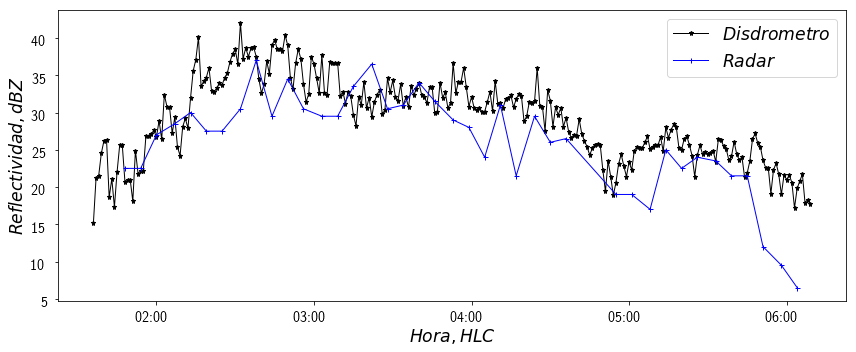

In [26]:
start = '2016-07-06 01:35'
end = '2016-07-06 06:10'
dates = results2.index[(results2.index > start) & (results2.index < end)]
dates2 = df_77.index[(df_77.index > start) & (df_77.index < end) ]
dates1 = df_all.index[(df_all.index > start) & (df_all.index < end)]
dates3 = df_201.index[(df_201.index > start) & (df_201.index < end)]

plt.figure(figsize=(12,5))
plt.plot(results2.loc[dates].index.to_pydatetime(), results2.loc[dates, 'Z_mred'],'k-*', markersize=5, linewidth=1)
plt.plot(df_all.loc[dates1].index, df_all.loc[dates1, 'DBZH'], 'b-+', markersize=5, linewidth=1)

plt.xlabel('$Hora, HLC$', fontsize='xx-large')
plt.ylabel(ur'$Reflectividad, dBZ$', fontsize='xx-large')
plt.yticks(usetex=True, size='x-large')
plt.xticks(usetex=True, size='x-large')
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.legend([ur'$Disdrometro$', '$Radar$'], loc=1, prop={'size': 'xx-large'})
plt.tight_layout()
plt.savefig('{}/Z_disd_radar_series_77.png'.format(save_figs), type='png', bbox_inches='tight', dpi=300)